In [175]:
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


import datetime

import Cat

In [176]:
dataset = pd.read_csv('../../data/funda_train.csv')

# EDA

1. 0, Nan 값 체크

2. 시간 별 매출
3. 지역 별 매출
4. 업종 별 매출
5. 가게 별 매출

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   store_id          int64  
 1   card_id           int64  
 2   card_company      object 
 3   transacted_date   object 
 4   transacted_time   object 
 5   installment_term  int64  
 6   region            object 
 7   type_of_business  object 
 8   amount            float64
dtypes: float64(1), int64(3), object(5)
memory usage: 450.2+ MB


In [4]:
dataset.isin([0]).sum()

store_id               4481
card_id                   5
card_company              0
transacted_date           0
transacted_time           0
installment_term    6327632
region                    0
type_of_business          0
amount                   80
dtype: int64

In [5]:
dataset.isnull().sum() 

store_id                  0
card_id                   0
card_company              0
transacted_date           0
transacted_time           0
installment_term          0
region              2042766
type_of_business    3952609
amount                    0
dtype: int64

In [179]:
dataset['region'] = dataset['region'].fillna('지역 모름')
dataset['type_of_business'] = dataset['type_of_business'].fillna('업종 모름')

dataset.isnull().sum() # 결측지가 잘 대체됐는지 확인

store_id            0
card_id             0
card_company        0
transacted_date     0
transacted_time     0
installment_term    0
region              0
type_of_business    0
amount              0
dtype: int64

In [180]:
dataset['datetime'] = pd.to_datetime(dataset.transacted_date + " " + 
                                dataset.transacted_time, format='%Y-%m-%d %H:%M:%S')

dataset['time'] = dataset['datetime'].dt.time
dataset['day'] = dataset['datetime'].dt.day
dataset['month'] = dataset['datetime'].dt.month

In [190]:
dataset['시도 구분'] = dataset['region'].str[0:2]


In [191]:
dataset

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,datetime,time,day,month,시도 구분
0,0,0,b,2016-06-01,13:13,0,지역 모름,기타 미용업,1857.142857,2016-06-01 13:13:00,13:13:00,1,6,지역
1,0,1,h,2016-06-01,18:12,0,지역 모름,기타 미용업,857.142857,2016-06-01 18:12:00,18:12:00,1,6,지역
2,0,2,c,2016-06-01,18:52,0,지역 모름,기타 미용업,2000.000000,2016-06-01 18:52:00,18:52:00,1,6,지역
3,0,3,a,2016-06-01,20:22,0,지역 모름,기타 미용업,7857.142857,2016-06-01 20:22:00,20:22:00,1,6,지역
4,0,4,c,2016-06-02,11:06,0,지역 모름,기타 미용업,2000.000000,2016-06-02 11:06:00,11:06:00,2,6,지역
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6556608,2136,4663855,d,2019-02-28,23:20,0,제주 제주시,기타 주점업,-4500.000000,2019-02-28 23:20:00,23:20:00,28,2,제주
6556609,2136,4663855,d,2019-02-28,23:24,0,제주 제주시,기타 주점업,4142.857143,2019-02-28 23:24:00,23:24:00,28,2,제주
6556610,2136,4663489,a,2019-02-28,23:24,0,제주 제주시,기타 주점업,4500.000000,2019-02-28 23:24:00,23:24:00,28,2,제주
6556611,2136,4663856,d,2019-02-28,23:27,0,제주 제주시,기타 주점업,571.428571,2019-02-28 23:27:00,23:27:00,28,2,제주


In [115]:
dataset['type_of_business'].value_counts()

업종 모름                       3952609
한식 음식점업                      745905
두발 미용업                       178475
의복 소매업                       158234
기타 주점업                       102413
                             ...   
곡물 및 기타 식량작물 재배업                569
주방용품 및 가정용 유리, 요업 제품 소매업        551
배전반 및 전기 자동제어반 제조업              533
그 외 기타 생활용품 도매업                 519
신선식품 및 단순 가공식품 도매업              231
Name: type_of_business, Length: 146, dtype: int64

In [192]:
def business_sales(business_type, datetimes): 

    """ parameter
        business_type : dataset['type_of_business']에 있는 업종명을 넣어주세요.
        datetimes : 셋 중에 하나를 선택하세요. time, day, month 
    """
    
    dataset_ = dataset.loc[(dataset['시도 구분'] == business_type), ['amount',datetimes]]
    group = dataset_['amount'].groupby(dataset_[datetimes]) 

    fig = px.line(group.sum(), title = business_type + " 매출")
    fig.show()

In [195]:
# '기타 주점업' , '한식 음식점업', '치킨 전문점' ,'한복 소매업','수영장 운영업'
business_sales('강원','month')

In [196]:
business_sales('부산','month')

In [123]:
drop_features = ['store_id', 'card_id', 'card_company', 'transacted_date',
       'transacted_time', 'installment_term', 'region', 'type_of_business','datetime']

#dataset_time = dataset_time.set_index('time')
dataset_times = dataset.drop(drop_features, axis=1)
dataset_times = dataset_times.sort_values(by=['time'], axis=0, ascending=True)

In [91]:
dataset_times

,amount,time,day,month
3093263,3428.571429,00:00:00,21,10
4985328,4714.285714,00:00:00,8,1
3537062,21428.571429,00:00:00,19,7
327899,1142.857143,00:00:00,20,7
5932538,12428.571429,00:00:00,2,11
...,...,...,...,...
182103,14285.714286,23:59:00,2,11
21988,5285.714286,23:59:00,4,7
1647177,39785.714286,23:59:00,30,11
1720597,12285.714286,23:59:00,18,10


In [168]:
grouped_time = (dataset['amount']/1000000).groupby(dataset['time'])
grouped_day = (dataset['amount']/10000000).groupby(dataset['day'])
grouped_month = (dataset['amount']/10000000).groupby(dataset['month'])

In [78]:
sns.set_style("darkgrid")
plt.rcParams['font.family'] = 'malgun gothic'

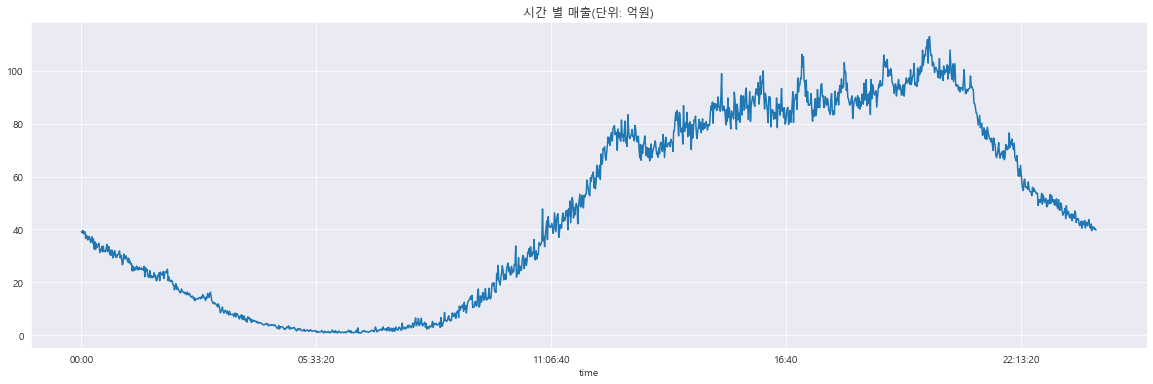

In [169]:
grouped_time.sum().plot(figsize = (20,6), 
                        title = '시간 별 매출(단위: 억원)')

plt.show()

In [170]:
fig = px.line(grouped_time.sum(), 
        title = '<b>시간 별 매출 (단위 : 억원)</b>')
fig.show()

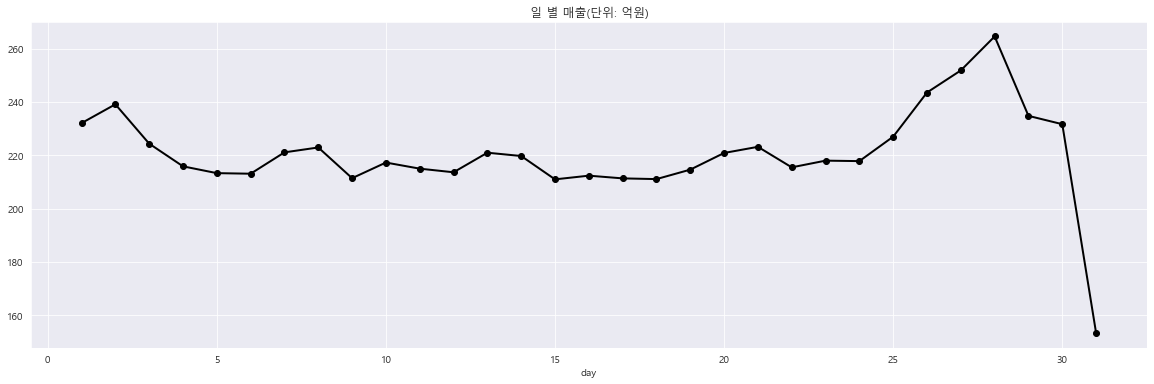

In [172]:
grouped_day.sum().plot(figsize = (20,6), 
                       title = '일 별 매출(단위: 억원)', 
                       marker='o',
                       linewidth=2,
                       color = 'k')

plt.show()

In [98]:
fig = px.line(grouped_day.sum(), 
        markers = 'o', 
        title = '<b>일 별 매출 (단위 : 억원)</b>')
fig.show()

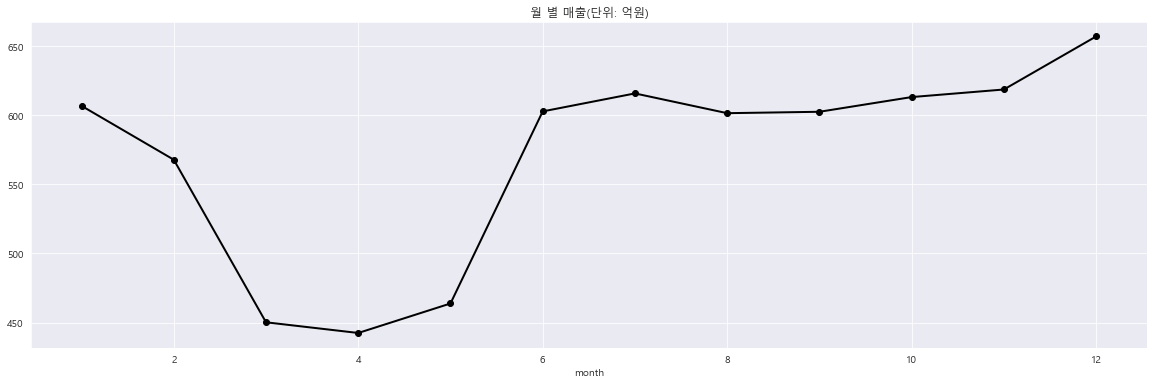

In [88]:
grouped_month.sum().plot(figsize = (20,6),
                         title = '월 별 매출(단위: 억원)', 
                         marker='o',
                         linewidth=2,
                         color = 'k')
plt.show()

In [99]:
fig = px.line(grouped_month.sum(), 
        markers = 'o', 
        title = '<b>월 별 매출 (단위 : 억원)</b>')
fig.show()

<AxesSubplot:>

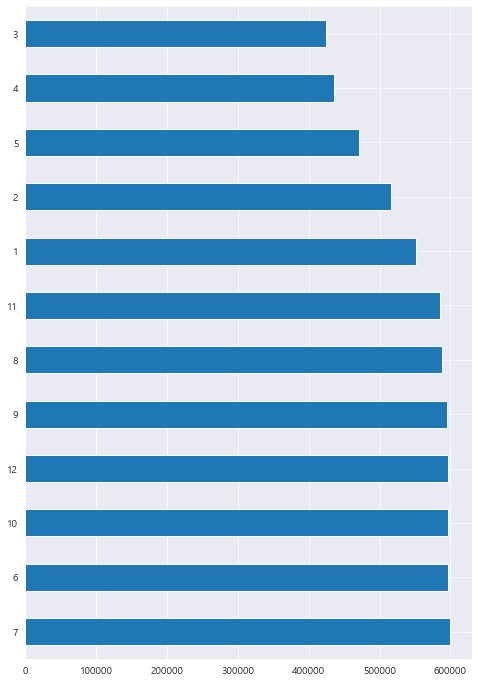

In [140]:
dataset['month'].value_counts().plot(figsize = (8,12),
                                     kind = 'barh')